# Calling necessasry libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn import metrics

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from pprint import pprint
from scipy.stats import loguniform
from math import sqrt

import time

# Reading the data

In [2]:
# Opening file
diam = pd.read_csv("diamonds.csv")
diam

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Variables Defination 

price : price in US dollars (\$326-\$18,823)

carat : weight of the diamond (0.2-5.01)   

cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color : diamond colour, from J (worst) to D (best)

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x : Diameter length in mm (0-10.74)

y : Diameter width in mm (0-58.9)

z : depth in mm (0-31.8)

depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43-79)

table : width of top of diamond relative to widest point (43-95)

In [3]:
# KNowing the structure of the data set
diam.shape

(53940, 11)

In [4]:
# Column informations like data type and null values
diam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


There are no null values, thus we do not need to take care of removing nulls or imputing any values. 

# 1. Data Pre-Processing

In [5]:
# Summary statistics of the columns
diam.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The 0's in x, y, and z columns anolamies, as those values cannot be 0 we need to remove those records.


# 1.1 Dealing with numerical data 

In [6]:
#Dropping the records with 0 dimensions 

diam = diam.drop(diam[diam["x"]==0].index)
diam = diam.drop(diam[diam["y"]==0].index)
diam = diam.drop(diam[diam["z"]==0].index)

# removing the column which are not required 

diam = diam.iloc[: , 1:]


In [7]:
diam.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


20 records with 0 dimensions are removed.

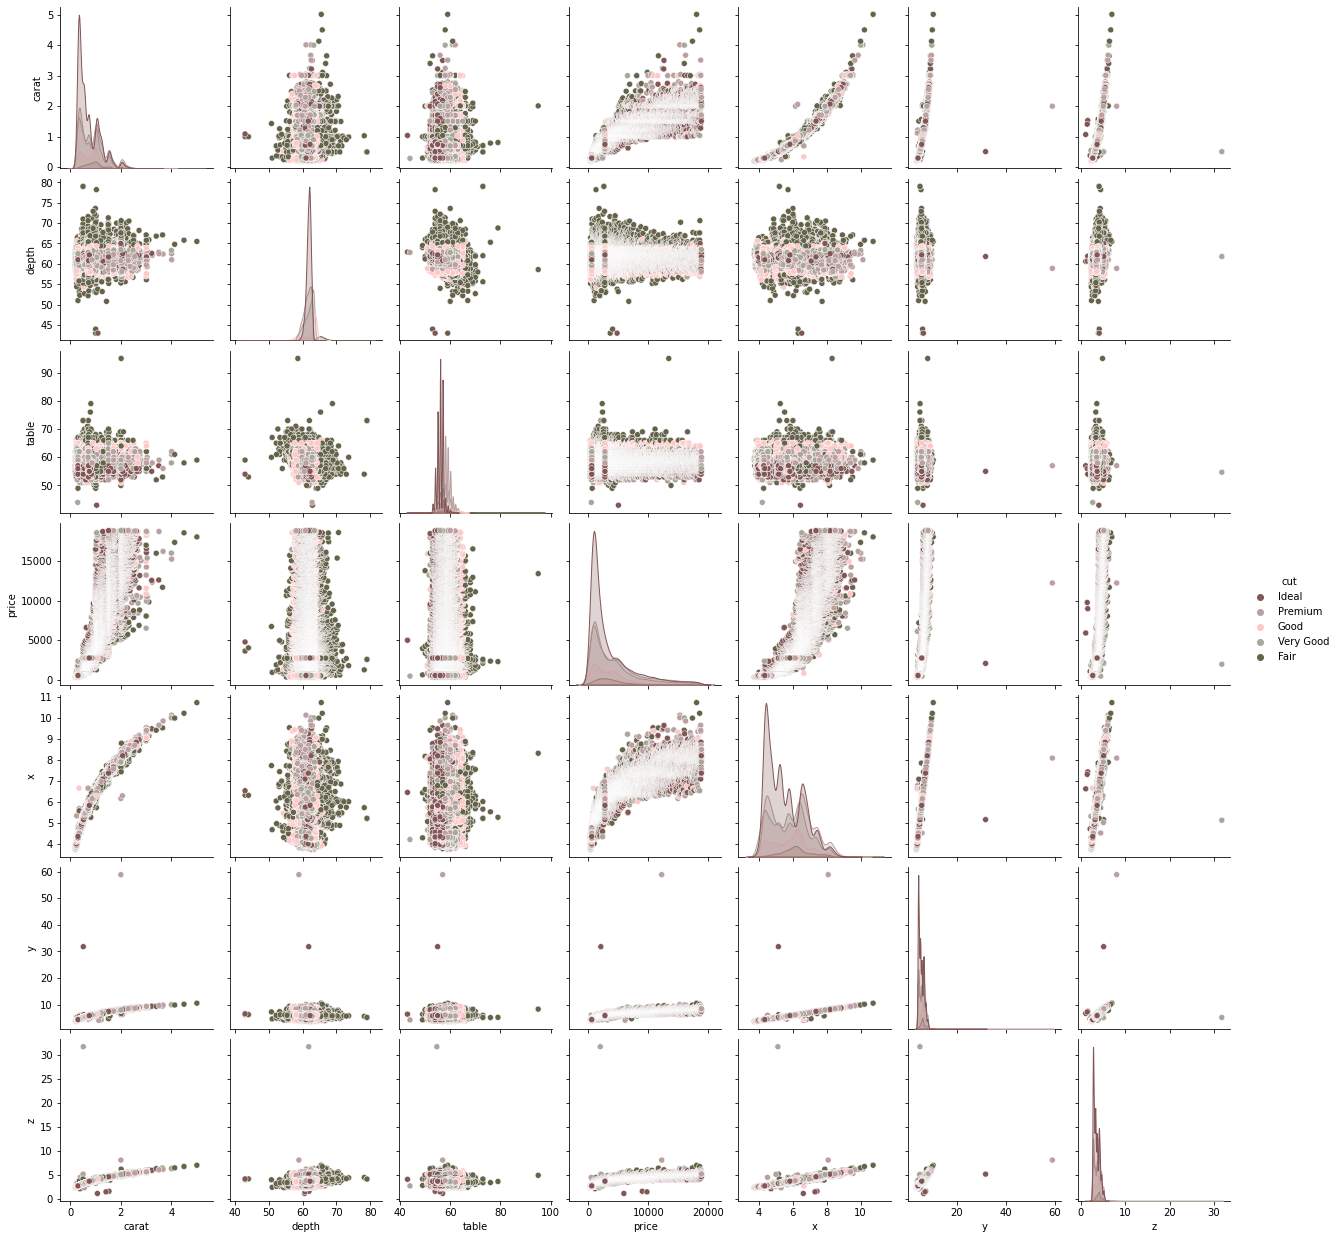

In [8]:
# visulalizing the outliers

shade = ["#835656", "#baa0a0", "#ffc7c8", 
         "#a9a799", "#65634a"]#shades for hue
ax = sn.pairplot(diam, 
                  hue= "cut",palette=shade)

In [9]:
# Removing the outliers

diam = diam[(diam["depth"]<75)&(diam["depth"]>45)]
diam = diam[(diam["table"]<80)&(diam["table"]>40)]
diam = diam[(diam["x"]<30)]
diam = diam[(diam["y"]<30)]
diam = diam[(diam["z"]<30)]

# 1.2 Dealing with categorial data

In [10]:
# Handling the columns with object type

s = (diam.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [11]:
# encoding Categorial data 

encoder = LabelEncoder()

diam['cut'] = encoder.fit_transform(diam['cut'])
cut_mappings = {index:label for index,label in enumerate(encoder.classes_)}

diam['color'] = encoder.fit_transform(diam['color'])
color_mappings = {index:label for index,label in enumerate(encoder.classes_)}

diam['clarity'] = encoder.fit_transform(diam['clarity'])
clarity_mappings = {index:label for index,label in enumerate(encoder.classes_)}

In [12]:
# TO know which value has been indexed with what number.

print(cut_mappings)
print(color_mappings)
print(clarity_mappings)

{0: 'Fair', 1: 'Good', 2: 'Ideal', 3: 'Premium', 4: 'Very Good'}
{0: 'D', 1: 'E', 2: 'F', 3: 'G', 4: 'H', 5: 'I', 6: 'J'}
{0: 'I1', 1: 'IF', 2: 'SI1', 3: 'SI2', 4: 'VS1', 5: 'VS2', 6: 'VVS1', 7: 'VVS2'}


In [13]:
diam

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [14]:
# Checking description again

diam.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000
mean,0.797658,2.553348,2.594083,3.835504,61.749703,57.455849,3930.822649,5.731540,5.733369,3.539318
std,0.473771,1.027422,1.701283,1.724561,1.420096,2.226151,3987.238899,1.119404,1.111273,0.691611
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5323.750000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


# 2. Exploratory Data Analysis

# 2.1 Exploring target variable

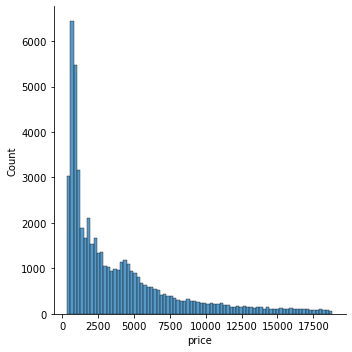

In [15]:
sn.displot(diam['price'])

In [16]:
# Skewness 
print("The skewness of the Price in the dataset is {}".format(diam['price'].skew()))

The skewness of the Price in the dataset is 1.6184252145572806


The target variable is right-skewed. 
The log transformation of this variable will make it normally distributes which is very important step in modelling. 

Skewness: 0.11552638223407066


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

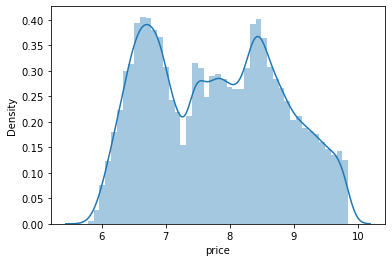

In [17]:
# Transforming the target variable with log of base 10

target = np.log(diam['price'])
print("Skewness: {}".format(target.skew()))
log_price = sn.distplot(target)
log_price

This helped to change the distribution towards normal distribution

# 2.2 Exploring independent variables

{0: 'D', 1: 'E', 2: 'F', 3: 'G', 4: 'H', 5: 'I', 6: 'J'}


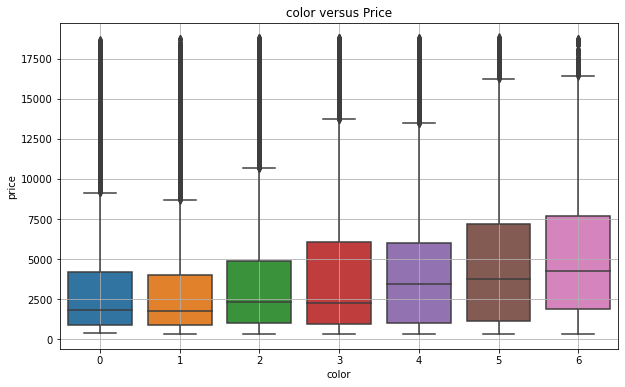

In [18]:
# Box plot for knowing the relation of each category of color with price

plt.figure(figsize=(10,6))
sn.boxplot(data = diam, x = 'color', y = 'price')
print(color_mappings)
plt.title("color versus Price")
plt.grid()


{0: 'I1', 1: 'IF', 2: 'SI1', 3: 'SI2', 4: 'VS1', 5: 'VS2', 6: 'VVS1', 7: 'VVS2'}


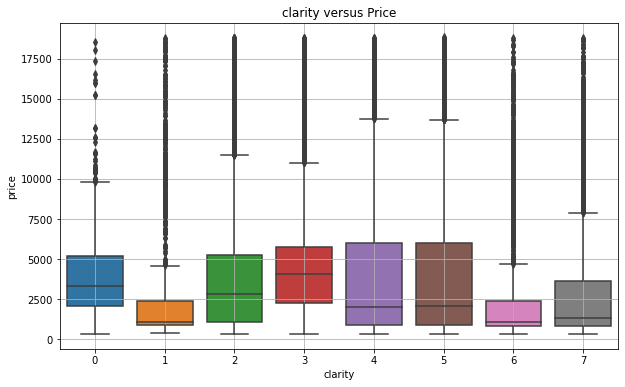

In [19]:
# Box plot for knowing the relation of each category of clarity with price

plt.figure(figsize=(10,6))
sn.boxplot(data = diam, x = 'clarity', y = 'price')
print(clarity_mappings)
plt.title("clarity versus Price")
plt.grid()

{0: 'Fair', 1: 'Good', 2: 'Ideal', 3: 'Premium', 4: 'Very Good'}


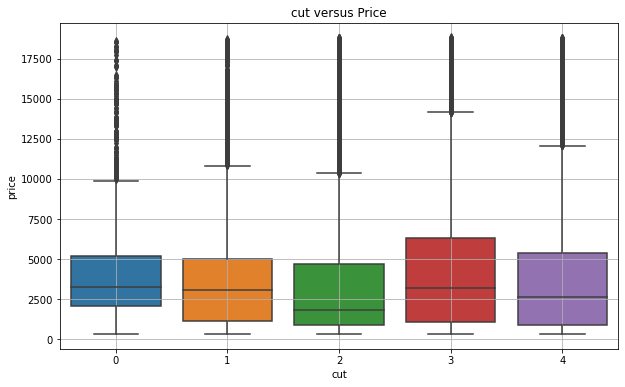

In [20]:
# Box plot for knowing the relation of each category of cut with price

plt.figure(figsize=(10,6))
sn.boxplot(data = diam, x = 'cut', y = 'price')
print(cut_mappings)
plt.title("cut versus Price")
plt.grid()

All of above three box plots shows that all categories in each of the three variables are right(positive) skewed. And the skewness decreases with the decrease in grade. In color category D has maximum skewness and J has minimum skewness. 

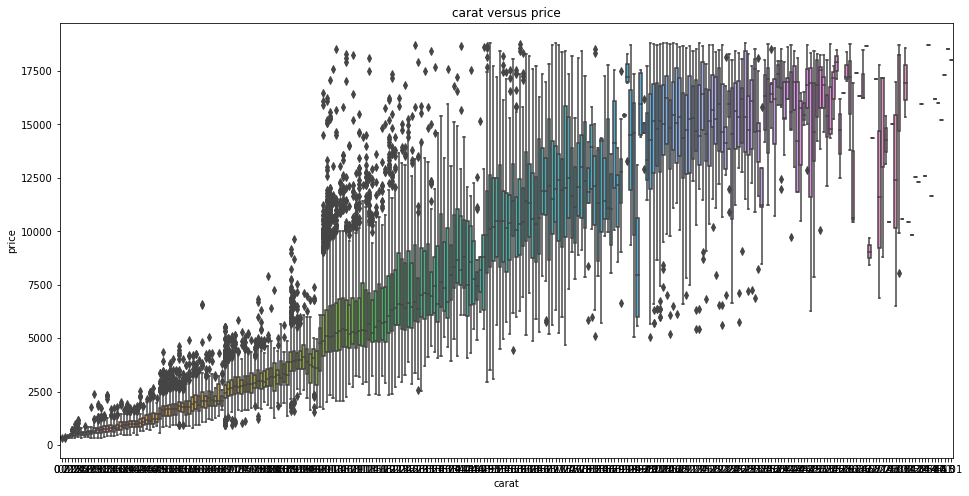

In [21]:
# Box plot for knowing the relation of carat with price

fig=plt.figure(figsize=(16,8))
sn.boxplot(x="carat",y="price",data=diam)
plt.title("carat versus price")
plt.show()

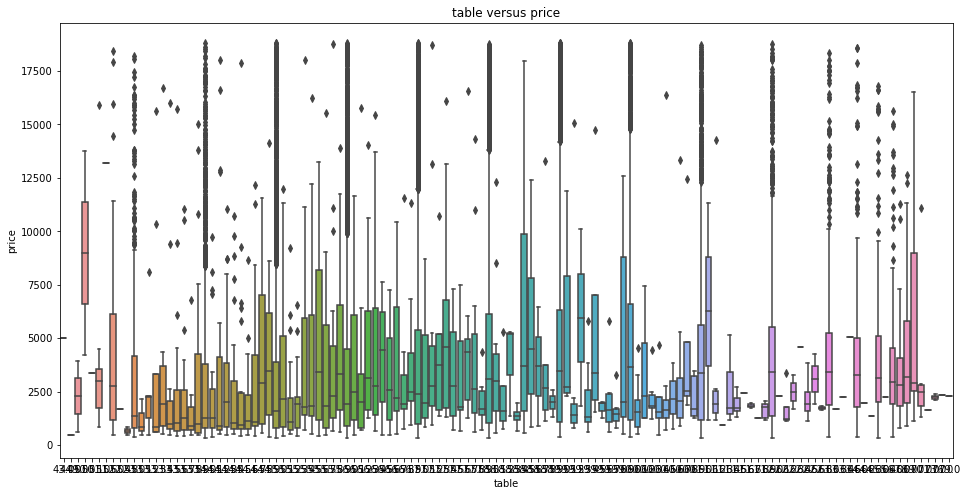

In [22]:
# Box plot for knowing the relation of Table with price

fig=plt.figure(figsize=(16,8))
sn.boxplot(x="table",y="price",data=diam)
plt.title("table versus price")
plt.show()

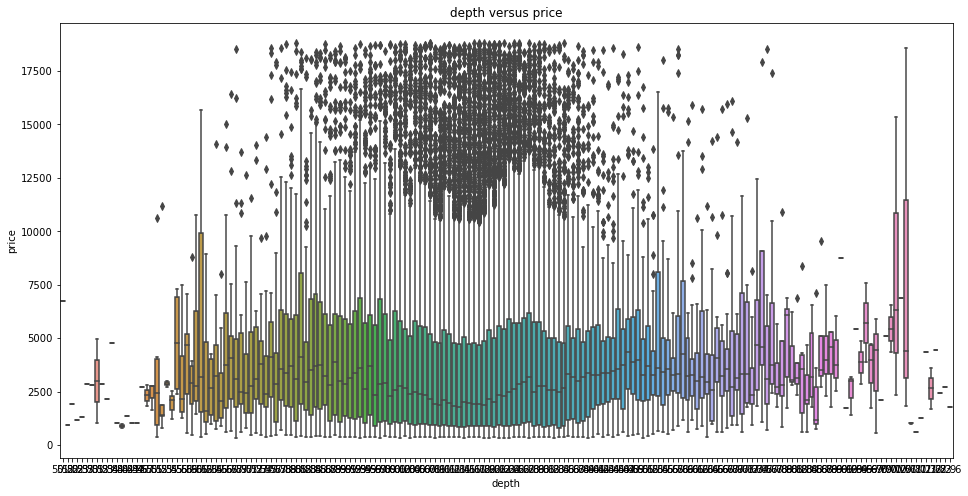

In [23]:
# Box plot for knowing the relation of Table with price

fig=plt.figure(figsize=(16,8))
sn.boxplot(x="depth",y="price",data=diam)
plt.title("depth versus price")
plt.show()

# 3. Feature Selection

It is important to know what features should be selected to optimise the model performance. 

# 3.1 Correlation matrix using pearson correlation coefficient

The reason of using pearson correlation coefficient over spearman rank correlation coefficient is becasue there is a linear relation between the independent and target variable.

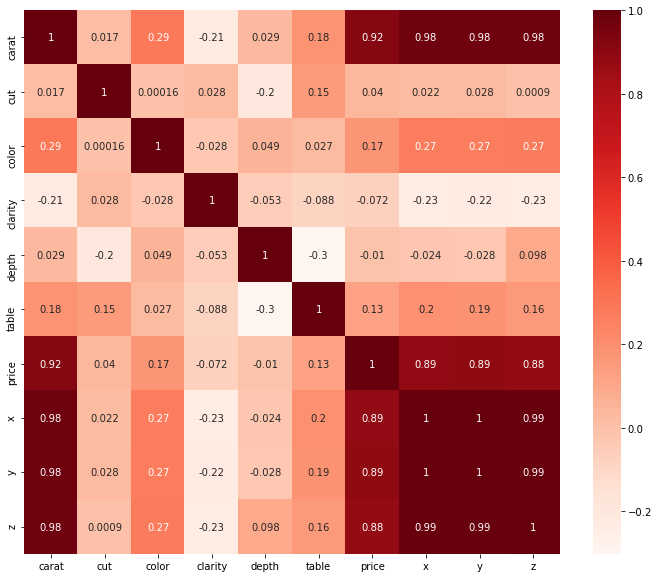

In [24]:
# Pearson Correlation to understand the correlation between variables

plt.figure(figsize=(12,10))
cor = diam.corr()
sn.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()

From the correlation matrix it can be determined that there is a problem of multicolinearity and that can have an adverse 
effect on out prediciton model. Thus the variables x,y and z which are responsible for multicolinearity needs to be taken care of.


# 3.2 Feature Engineering

Here one of the way to handle the problem is by deleting one or more highly correlated independent variable. But instead we will use one additional column named "Volume" as all of the parameters x,y and z are important in determination of size of a diamonds. and than delete those 3 columns.

In [25]:
# Creating new field by meaging x,y and Z

#diam['volume'] = diam.x * diam.y * diam.z
diam.drop(['x','y','z'], axis=1, inplace=True)
diam.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,2,1,3,61.5,55.0,326
1,0.21,3,1,2,59.8,61.0,326
2,0.23,1,1,4,56.9,65.0,327
3,0.29,3,5,5,62.4,58.0,334
4,0.31,1,6,3,63.3,58.0,335


# 3.3 Feature Scaling and normalising

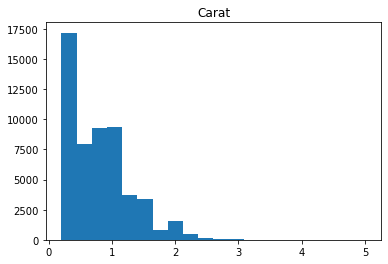

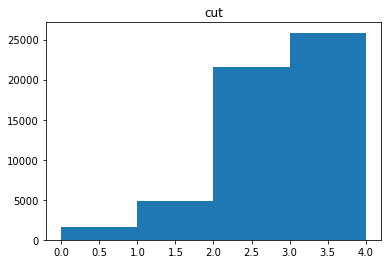

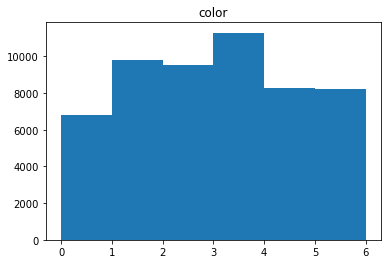

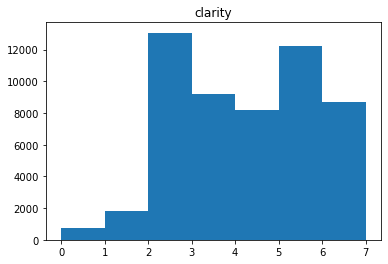

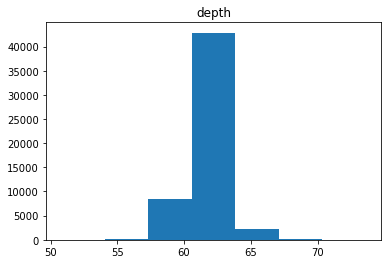

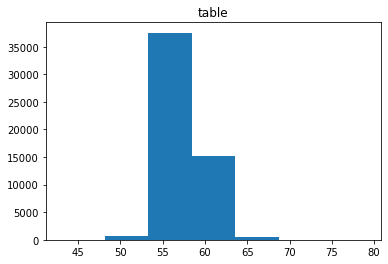

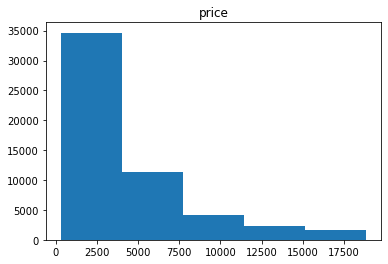

In [26]:
# Histograms - To understand the distribution of all the variables

plt.hist(diam['carat'], bins = 20)
plt.title("Carat")
plt.show()
plt.hist(diam['cut'], bins = 4)
plt.title("cut")
plt.show()
plt.hist(diam['color'], bins = 6)
plt.title("color")
plt.show()
plt.hist(diam['clarity'], bins = 7)
plt.title("clarity")
plt.show()
plt.hist(diam['depth'], bins = 7)
plt.title("depth")
plt.show()
plt.hist(diam['table'], bins = 7)
plt.title("table")
plt.show()
#plt.hist(diam['volume'], bins = 5)
#plt.title("volume")
#plt.show()
plt.hist(diam['price'], bins = 5)
plt.title("price")
plt.show()

From the above bar graphs it can be clearly seen that "carat","cut", "clarity" and "price" are positivel or negatively skewed thus log of base 10 could be best but it was making float number very large thus I will use MinMaxScaler for feature scaling but that too did not perform better, Thus Finally I used Generalisation on negatively skewed data. However "color", "depth' and "table" shows normal distribution which will be scaled by standardization. 

In [27]:
# Individually handling each variable to scale/normalise with the most suitable method

# Log of base 10

diam['log_carat'] = np.log(diam['carat'])
#diam['log_cut'] = np.log(diam['cut'])         NOt using a log makes left skewed data very small. (very near to 0)
#diam['log_clarity'] = np.log(diam['clarity']) NOt using a log makes left skewed data very small. (very near to 0)
#diam['log_volume'] = np.log(diam['volume'])
diam['log_price'] = np.log(diam['price'])

# Mix max scaler

mms = MinMaxScaler()
diam['mms_carat'] = mms.fit_transform(diam[['carat']])
diam['mms_cut'] = mms.fit_transform(diam[['cut']])
diam['mms_clarity'] = mms.fit_transform(diam[['clarity']])
#diam['mms_volume'] = mms.fit_transform(diam[['volume']])
diam['mms_price'] = mms.fit_transform(diam[['price']])

# Power Transforamtion

pt = PowerTransformer()
diam['pt_carat'] = pt.fit_transform(diam[['carat']])
diam['pt_cut'] = pt.fit_transform(diam[['cut']])
diam['pt_clarity'] = pt.fit_transform(diam[['clarity']])
#diam['pt_volume'] = pt.fit_transform(diam[['volume']])
diam['pt_price'] = pt.fit_transform(diam[['price']])

# Standard Scaler

ss= StandardScaler()
diam['ss_color'] = ss.fit_transform(diam[['color']])
diam['ss_depth'] = ss.fit_transform(diam[['depth']]) 
diam['ss_table'] = ss.fit_transform(diam[['table']])

diam

C:\Users\dell\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,carat,cut,color,clarity,depth,table,price,log_carat,log_price,mms_carat,mms_cut,mms_clarity,mms_price,pt_carat,pt_cut,pt_clarity,pt_price,ss_color,ss_depth,ss_table
0,0.23,2,1,3,61.5,55.0,326,-1.469676,5.786897,0.006237,0.50,0.428571,0.000000,-1.706728,-0.560568,-0.433099,0.0,-0.936997,-0.175837,-1.103192
1,0.21,3,1,2,59.8,61.0,326,-1.560648,5.786897,0.002079,0.75,0.285714,0.000000,-1.815867,0.419323,-1.067317,0.0,-0.936997,-1.372951,1.592069
2,0.23,1,1,4,56.9,65.0,327,-1.469676,5.789960,0.006237,0.25,0.571429,0.000054,-1.706728,-1.490558,0.152271,0.0,-0.936997,-3.415085,3.388909
3,0.29,3,5,5,62.4,58.0,334,-1.237874,5.811141,0.018711,0.75,0.714286,0.000433,-1.402059,0.419323,0.701446,0.0,1.414191,0.457929,0.244438
4,0.31,1,6,3,63.3,58.0,335,-1.171183,5.814131,0.022869,0.25,0.428571,0.000487,-1.307459,-1.490558,-0.433099,0.0,2.001988,1.091695,0.244438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,-0.328504,7.921898,0.108108,0.50,0.285714,0.131427,0.097912,-0.560568,-1.067317,0.0,-1.524794,-0.668766,-0.204772
53936,0.72,1,0,2,63.1,55.0,2757,-0.328504,7.921898,0.108108,0.25,0.285714,0.131427,0.097912,-1.490558,-1.067317,0.0,-1.524794,0.950858,-1.103192
53937,0.70,4,0,2,62.8,60.0,2757,-0.356675,7.921898,0.103950,1.00,0.285714,0.131427,0.046872,1.438075,-1.067317,0.0,-1.524794,0.739603,1.142858
53938,0.86,3,4,3,61.0,58.0,2757,-0.150823,7.921898,0.137214,0.75,0.428571,0.131427,0.420843,0.419323,-0.433099,0.0,0.826394,-0.527929,0.244438


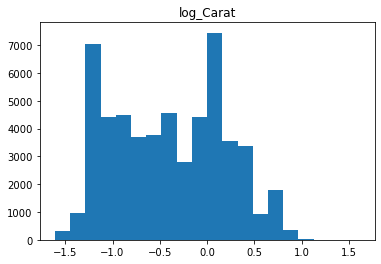

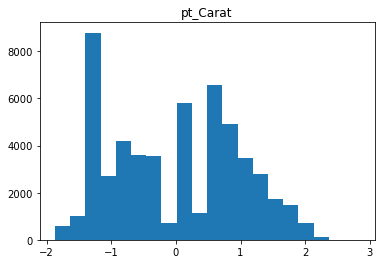

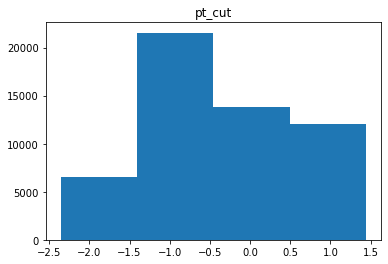

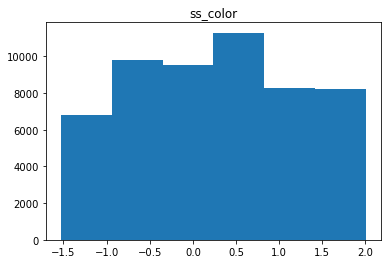

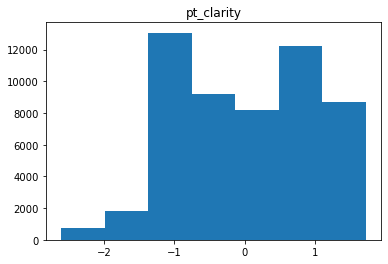

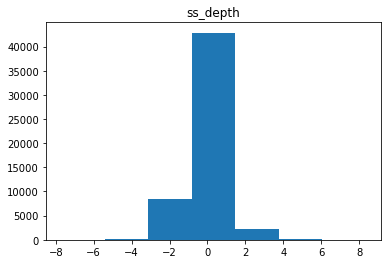

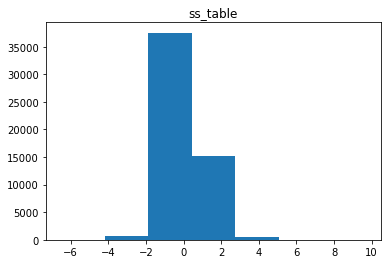

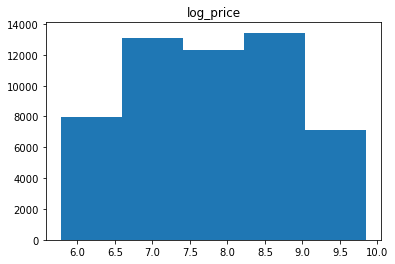

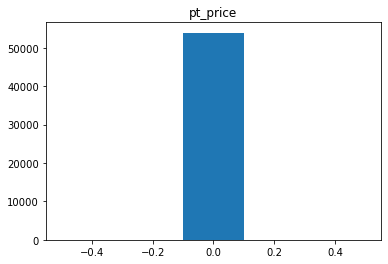

In [28]:
# Checking the distribution again

plt.hist(diam['log_carat'], bins = 20)
plt.title("log_Carat")
plt.show()
plt.hist(diam['pt_carat'], bins = 20)
plt.title("pt_Carat")
plt.show()
plt.hist(diam['pt_cut'], bins = 4)
plt.title("pt_cut")
plt.show()
plt.hist(diam['ss_color'], bins = 6)
plt.title("ss_color")
plt.show()
plt.hist(diam['pt_clarity'], bins = 7)
plt.title("pt_clarity")
plt.show()
plt.hist(diam['ss_depth'], bins = 7)
plt.title("ss_depth")
plt.show()
plt.hist(diam['ss_table'], bins = 7)
plt.title("ss_table")
plt.show()

plt.hist(diam['log_price'], bins = 5)
plt.title("log_price")
plt.show()
plt.hist(diam['pt_price'], bins = 5)
plt.title("pt_price")
plt.show()

From the above graphs, the effect on scaling and normalisation can be seen on different variables.    
carat and price: log performs better (Scaling)   
cut and clarity: PowerTransformer performs better (generalisation)   
color, depth and table: StandardScaler (Scaling)   

Extracting only scaled variables for further modelling

In [29]:
# Fianl set by eliminatiing the unwanted columns 

s_diam = diam.drop(['carat','cut','color','clarity','depth','table','price','mms_cut','mms_clarity','mms_carat','mms_price','pt_carat','pt_price',], axis = 1)
s_diam.head()


,log_carat,log_price,pt_cut,pt_clarity,ss_color,ss_depth,ss_table
0,-1.469676,5.786897,-0.560568,-0.433099,-0.936997,-0.175837,-1.103192
1,-1.560648,5.786897,0.419323,-1.067317,-0.936997,-1.372951,1.592069
2,-1.469676,5.789960,-1.490558,0.152271,-0.936997,-3.415085,3.388909
3,-1.237874,5.811141,0.419323,0.701446,1.414191,0.457929,0.244438
4,-1.171183,5.814131,-1.490558,-0.433099,2.001988,1.091695,0.244438


In [30]:
# Indexing 
s_diam = s_diam.reindex(columns=['log_carat', 'pt_cut','pt_clarity','ss_color','ss_depth','ss_table','log_price'])
s_diam.head()

,log_carat,pt_cut,pt_clarity,ss_color,ss_depth,ss_table,log_price
0,-1.469676,-0.560568,-0.433099,-0.936997,-0.175837,-1.103192,5.786897
1,-1.560648,0.419323,-1.067317,-0.936997,-1.372951,1.592069,5.786897
2,-1.469676,-1.490558,0.152271,-0.936997,-3.415085,3.388909,5.789960
3,-1.237874,0.419323,0.701446,1.414191,0.457929,0.244438,5.811141
4,-1.171183,-1.490558,-0.433099,2.001988,1.091695,0.244438,5.814131


In [31]:
# Checking the Data type for the final set

s_diam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53910 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   log_carat   53910 non-null  float64
 1   pt_cut      53910 non-null  float64
 2   pt_clarity  53910 non-null  float64
 3   ss_color    53910 non-null  float64
 4   ss_depth    53910 non-null  float64
 5   ss_table    53910 non-null  float64
 6   log_price   53910 non-null  float64
dtypes: float64(7)
memory usage: 5.3 MB


# This is a Multivariate regression supervised learning problem.

# 4. Splitting traning and test samples

In [32]:
x = s_diam.iloc[:,:-1]
y = s_diam.iloc[:, 6]

print(x,y)
print(len(x))
print(len(y))

       log_carat    pt_cut  pt_clarity  ss_color  ss_depth  ss_table
0      -1.469676 -0.560568   -0.433099 -0.936997 -0.175837 -1.103192
1      -1.560648  0.419323   -1.067317 -0.936997 -1.372951  1.592069
2      -1.469676 -1.490558    0.152271 -0.936997 -3.415085  3.388909
3      -1.237874  0.419323    0.701446  1.414191  0.457929  0.244438
4      -1.171183 -1.490558   -0.433099  2.001988  1.091695  0.244438
...          ...       ...         ...       ...       ...       ...
53935  -0.328504 -0.560568   -1.067317 -1.524794 -0.668766 -0.204772
53936  -0.328504 -1.490558   -1.067317 -1.524794  0.950858 -1.103192
53937  -0.356675  1.438075   -1.067317 -1.524794  0.739603  1.142858
53938  -0.150823  0.419323   -0.433099  0.826394 -0.527929  0.244438
53939  -0.287682 -0.560568   -0.433099 -1.524794  0.317092 -1.103192

[53910 rows x 6 columns] 0        5.786897
1        5.786897
2        5.789960
3        5.811141
4        5.814131
           ...   
53935    7.921898
53936    7.921898
53

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

len(x_train) , len(x_test), len(y_train),len(y_test)

(43128, 10782, 43128, 10782)

# 5. Training models

# 5.1 Mutiple Linear Regression

In [34]:
start = time.time()

lr = LinearRegression()

lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

score_lr= lr.score(x_test,y_test)
accuracy_lr= cross_val_score(estimator=lr,X= x_train, y= y_train,cv=10, verbose=1)
r2_lr= r2_score(y_test,y_pred)
mse_lr = mean_squared_error(y_test,y_pred)

end = time.time()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [35]:
# Coefficient and intercept

print("lr.coeff_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coeff_:[ 1.782036    0.00606993  0.11220309 -0.10871598 -0.03012923 -0.03646859]
lr.intercept_:8.490174004928186


In [36]:
#printing results 
print("Training set score: {:.2f}".format(lr.score(x_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(x_test,y_test)))

print("Cross Validation accuracy: ",accuracy_lr)
print("Coefficient of Determination r2_score is: ",r2_lr)
print("Mean squared error is: ",mse_lr)

total_time = end - start
print("\nTotal Time Taken: "+ str(total_time))

print('\nParameters currently in use:\n')
pprint(lr.get_params())


Training set score: 0.96
Test set score: 0.96
Cross Validation accuracy:  [0.95536998 0.95940965 0.95648862 0.95762831 0.95683364 0.95651646
 0.95548958 0.95462023 0.95803584 0.95670198]
Coefficient of Determination r2_score is:  0.9564551299139501
Mean squared error is:  0.04505596090383552

Total Time Taken: 0.22999906539916992

Parameters currently in use:

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}


In [37]:
# table showing the difference between the actual and predicted diamond prices

d = {'true': np.exp(y_test), 'predicted': np.exp(y_pred)}
df_lr = pd.DataFrame(data=d)
#df_lr['original'] = np.exp(df_lr['log_true'])
#df_lr['predicted'] = np.exp(df_lr['log_predicted'])
df_lr['diff'] = df_lr['true']-df_lr['predicted']


df_lr

,true,predicted,diff
38061,1013.0,948.787647,64.212353
50742,2297.0,2015.259805,281.740195
41452,1229.0,760.374397,468.625603
2520,3203.0,3702.510027,-499.510027
48802,2025.0,1727.958442,297.041558
...,...,...,...
20432,8788.0,6843.439715,1944.560285
22508,10546.0,6138.316954,4407.683046
13926,5666.0,5033.456271,632.543729
14594,5889.0,5277.426879,611.573121


# 5.2 Ridge Regression

In [38]:
start = time.time()

n_samples, n_features = 10, 7
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

y_pred=ridge.predict(x_test)

accuracy_ridge= cross_val_score(estimator=ridge,X= x_train, y= y_train,cv=10, verbose=1)
r2_ridge= r2_score(y_test,y_pred)
mse_ridge = mean_squared_error(y_test,y_pred)

end = time.time()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


In [39]:
#printing results 
print("Training set score: {:.2f}".format(ridge.score(x_train,y_train)))
print("Test set score: {:.2f}".format(ridge.score(x_test,y_test)))

print("Cross Validation accuracy: ",accuracy_ridge)
print("Coefficient of Determination r2_score is: ",r2_ridge)
print("Mean squared error is: ",mse_ridge)

total_time = end - start
print("\nTotal Time Taken: "+ str(total_time))

print('\nParameters currently in use:\n')
pprint(ridge.get_params())

Training set score: 0.96
Test set score: 0.96
Cross Validation accuracy:  [0.95536994 0.9594095  0.95648864 0.95762827 0.95683377 0.95651651
 0.95548955 0.95462024 0.95803582 0.95670207]
Coefficient of Determination r2_score is:  0.9564551868272655
Mean squared error is:  0.04505590201551849

Total Time Taken: 0.3470025062561035

Parameters currently in use:

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}


In [40]:
# table showing the difference between the actual and predicted diamond prices

d = {'true': np.exp(y_test), 'predicted': np.exp(y_pred)}
df_lr = pd.DataFrame(data=d)
#df_lr['original'] = np.exp(df_lr['log_true'])
#df_lr['predicted'] = np.exp(df_lr['log_predicted'])
df_lr['diff'] = df_lr['true']-df_lr['predicted']


df_lr

,true,predicted,diff
38061,1013.0,948.793179,64.206821
50742,2297.0,2015.251637,281.748363
41452,1229.0,760.383290,468.616710
2520,3203.0,3702.479075,-499.479075
48802,2025.0,1727.960230,297.039770
...,...,...,...
20432,8788.0,6843.372854,1944.627146
22508,10546.0,6138.266298,4407.733702
13926,5666.0,5033.429495,632.570505
14594,5889.0,5277.398210,611.601790


# 5.3 Lasso Regression

In [41]:
start = time.time()

n_samples, n_features = 10, 7
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

y_pred=lasso.predict(x_test)

accuracy_lasso = cross_val_score(estimator=lasso,X= x_train, y= y_train,cv=10, verbose=1)
r2_lasso= r2_score(y_test,y_pred)
mse_lasso = mean_squared_error(y_test,y_pred)

end = time.time()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


In [42]:
#printing results 
print("Training set score: {:.2f}".format(lasso.score(x_train,y_train)))
print("Test set score: {:.2f}".format(lasso.score(x_test,y_test)))

print("Cross Validation accuracy: ",accuracy_lasso)
print("Coefficient of Determination r2_score is: ",r2_lasso)
print("Mean squared error is: ",mse_lasso)

total_time = end - start
print("\nTotal Time Taken: "+ str(total_time))

print('\nParameters currently in use:\n')
pprint(lasso.get_params())

Training set score: 0.90
Test set score: 0.91
Cross Validation accuracy:  [0.90190001 0.90285293 0.90522759 0.90433093 0.90747938 0.9051157
 0.9016196  0.90473269 0.90506495 0.90503991]
Coefficient of Determination r2_score is:  0.9056775430374371
Mean squared error is:  0.09759562779406264

Total Time Taken: 0.2940199375152588

Parameters currently in use:

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}


In [43]:
# table showing the difference between the actual and predicted diamond prices

d = {'true': np.exp(y_test), 'predicted': np.exp(y_pred)}
df_lr = pd.DataFrame(data=d)
#df_lr['original'] = np.exp(df_lr['log_true'])
#df_lr['predicted'] = np.exp(df_lr['log_predicted'])
df_lr['diff'] = df_lr['true']-df_lr['predicted']


df_lr

,true,predicted,diff
38061,1013.0,1091.513257,-78.513257
50742,2297.0,1595.661661,701.338339
41452,1229.0,1171.795051,57.204949
2520,3203.0,2592.113226,610.886774
48802,2025.0,1820.596206,204.403794
...,...,...,...
20432,8788.0,4870.348940,3917.651060
22508,10546.0,4337.324669,6208.675331
13926,5666.0,4279.168136,1386.831864
14594,5889.0,4513.091274,1375.908726


# 5.4 Decission Tree Regressor

In [44]:
start = time.time()

dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(x_train, y_train)

y_pred=dtr.predict(x_test)

accuracy_dtr = cross_val_score(estimator=dtr,X= x_train, y= y_train,cv=10, verbose=1)
r2_dtr= r2_score(y_test,y_pred)
mse_dtr = mean_squared_error(y_test,y_pred)

end = time.time()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished


In [45]:
#printing results 
print("Training set score: {:.2f}".format(dtr.score(x_train,y_train)))
print("Test set score: {:.2f}".format(dtr.score(x_test,y_test)))

print("Cross Validation accuracy: ",accuracy_dtr)
print("Coefficient of Determination r2_score is: ",r2_dtr)
print("Mean squared error is: ",mse_dtr)

total_time = end - start
print("\nTotal Time Taken: "+ str(total_time))

print('\nParameters currently in use:\n')
pprint(dtr.get_params())

Training set score: 1.00
Test set score: 0.98
Cross Validation accuracy:  [0.98132009 0.98143592 0.9800741  0.98167351 0.97999547 0.98061512
 0.98048495 0.98116993 0.98078436 0.98107303]
Coefficient of Determination r2_score is:  0.9811917753614204
Mean squared error is:  0.019460906240202018

Total Time Taken: 2.2490005493164062

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}


In [46]:
# table showing the difference between the actual and predicted diamond prices

d = {'true': np.exp(y_test), 'predicted': np.exp(y_pred)}
df_lr = pd.DataFrame(data=d)
#df_lr['original'] = np.exp(df_lr['log_true'])
#df_lr['predicted'] = np.exp(df_lr['log_predicted'])
df_lr['diff'] = df_lr['true']-df_lr['predicted']


df_lr

,true,predicted,diff
38061,1013.0,1004.0,9.0
50742,2297.0,2889.0,-592.0
41452,1229.0,1257.0,-28.0
2520,3203.0,3084.0,119.0
48802,2025.0,1847.0,178.0
...,...,...,...
20432,8788.0,8999.0,-211.0
22508,10546.0,10197.0,349.0
13926,5666.0,4958.0,708.0
14594,5889.0,5820.0,69.0


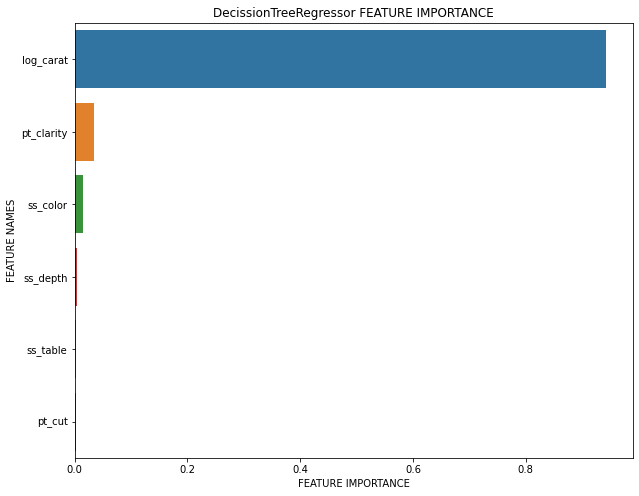

In [47]:
# Bar graph showing the importance of each features in Decssion tree regressor

def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    plt.figure(figsize=(10,8))

    sn.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
plot_feature_importance(dtr.feature_importances_,x.columns,'DecissionTreeRegressor ')


# 5.5 Random Forests Regressor

In [66]:
start = time.time()

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

accuracy_rfr = cross_val_score(estimator=rfr,X= x_train, y= y_train,cv=10, verbose=1)
r2_rfr= r2_score(y_test,y_pred)
mse_rfr = mean_squared_error(y_test,y_pred)

end = time.time()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.9min finished


In [67]:
#printing results 
print("Training set score: {:.2f}".format(rfr.score(x_train,y_train)))
print("Test set score: {:.2f}".format(rfr.score(x_test,y_test)))

print("Cross Validation accuracy: ",accuracy_rfr)
print("Coefficient of Determination r2_score is: ",r2_rfr)
print("Mean squared error is: ",mse_rfr)

total_time = end - start
print("\nTotal Time Taken: "+ str(total_time))

print('\nParameters currently in use:\n')
pprint(rfr.get_params())

Training set score: 1.00
Test set score: 0.99
Cross Validation accuracy:  [0.98836748 0.98846646 0.98729731 0.98876771 0.98775115 0.98812942
 0.98810163 0.98828813 0.98821728 0.98824669]
Coefficient of Determination r2_score is:  0.9883269827882227
Mean squared error is:  0.0120780933801

Total Time Taken: 127.1299684047699

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [50]:
# table showing the difference between the actual and predicted diamond prices

d = {'true': np.exp(y_test), 'predicted': np.exp(y_pred)}
df_lr = pd.DataFrame(data=d)
#df_lr['original'] = np.exp(df_lr['log_true'])
#df_lr['predicted'] = np.exp(df_lr['log_predicted'])
df_lr['diff'] = df_lr['true']-df_lr['predicted']


df_lr

,true,predicted,diff
38061,1013.0,971.077818,41.922182
50742,2297.0,2687.955881,-390.955881
41452,1229.0,1292.095751,-63.095751
2520,3203.0,3204.617576,-1.617576
48802,2025.0,1835.117501,189.882499
...,...,...,...
20432,8788.0,8478.742980,309.257020
22508,10546.0,10296.548235,249.451765
13926,5666.0,5237.575903,428.424097
14594,5889.0,5405.315980,483.684020


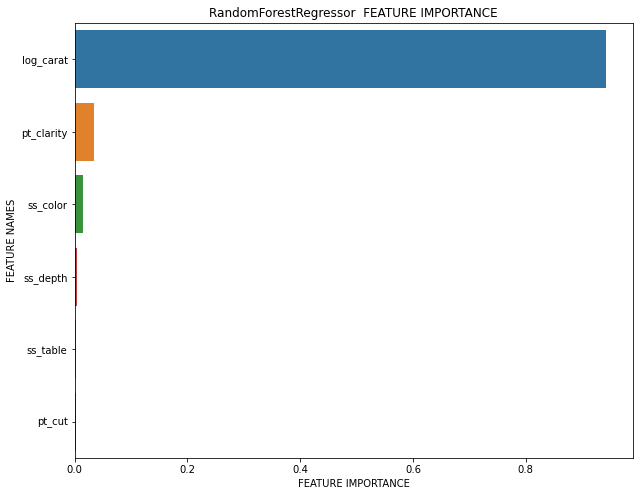

In [51]:
# Bar graph showing the importance of each features in Random Forests regressor

plot_feature_importance(rfr.feature_importances_,x.columns,'RandomForestRegressor  ')

# 5.6 XGBoost Regressor

In [52]:
start = time.time()

xgb_r = XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
xgb_r.fit(x_train, y_train)
y_pred = xgb_r.predict(x_test)

accuracy_xgb_r = cross_val_score(estimator=xgb_r,X= x_train, y= y_train,cv=8, verbose=1)
r2_xgb_r= r2_score(y_test,y_pred)
mse_xgb_r = mean_squared_error(y_test,y_pred)

end = time.time()

[21:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[21:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.3s finished


In [53]:
#printing results 
print("Training set score: {:.2f}".format(xgb_r.score(x_train,y_train)))
print("Test set score: {:.2f}".format(xgb_r.score(x_test,y_test)))

print("Cross Validation accuracy: ",accuracy_xgb_r)
print("Coefficient of Determination r2_score is: ",r2_xgb_r)
print("Mean squared error is: ",mse_xgb_r)

total_time = end - start
print("\nTotal Time Taken: "+ str(total_time))

print('\nParameters currently in use:\n')
pprint(xgb_r.get_params())

Training set score: 0.94
Test set score: 0.94
Cross Validation accuracy:  [0.94246771 0.94223386 0.94337837 0.94303901 0.94378146 0.94153728
 0.94190294 0.9426092 ]
Coefficient of Determination r2_score is:  0.9427584035772041
Mean squared error is:  0.05922799001127011

Total Time Taken: 2.651005744934082

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 10,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'objective': 'reg:linear',
 'predictor': 'auto',
 'random_state'

In [54]:
# table showing the difference between the actual and predicted diamond prices

d = {'true': np.exp(y_test), 'predicted': np.exp(y_pred)}
df_lr = pd.DataFrame(data=d)
#df_lr['original'] = np.exp(df_lr['log_true'])
#df_lr['predicted'] = np.exp(df_lr['log_predicted'])
df_lr['diff'] = df_lr['true']-df_lr['predicted']


df_lr

,true,predicted,diff
38061,1013.0,772.825684,240.174316
50742,2297.0,1594.757446,702.242554
41452,1229.0,1022.083862,206.916138
2520,3203.0,2459.834717,743.165283
48802,2025.0,1468.996094,556.003906
...,...,...,...
20432,8788.0,5927.562500,2860.437500
22508,10546.0,7056.832520,3489.167480
13926,5666.0,4137.675293,1528.324707
14594,5889.0,4269.589355,1619.410645


# 5.7 K Nearest Neighbor Regressor

In [55]:
params = {'n_neighbors':[2,3,4,5,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=10)
model.fit(x_train,y_train)
print(model.best_params_)

start = time.time()

knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

accuracy_knn = cross_val_score(estimator=knn,X= x_train, y= y_train,cv=10, verbose=1)
r2_knn= r2_score(y_test,y_pred)
mse_knn = mean_squared_error(y_test,y_pred)

end = time.time()

{'n_neighbors': 7}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.6s finished


In [56]:
#printing results 
print("Training set score: {:.2f}".format(knn.score(x_train,y_train)))
print("Test set score: {:.2f}".format(knn.score(x_test,y_test)))

print("Cross Validation accuracy: ",accuracy_knn)
print("Coefficient of Determination r2_score is: ",r2_knn)
print("Mean squared error is: ",mse_knn)

total_time = end - start
print("\nTotal Time Taken: "+ str(total_time))

print('\nParameters currently in use:\n')
pprint(knn.get_params())

Training set score: 0.96
Test set score: 0.94
Cross Validation accuracy:  [0.93994429 0.93901266 0.94134582 0.93947896 0.94203351 0.94061298
 0.93825493 0.9418781  0.94205118 0.94284298]
Coefficient of Determination r2_score is:  0.9423315256642153
Mean squared error is:  0.059669681409598545

Total Time Taken: 6.775078296661377

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}


In [57]:
# table showing the difference between the actual and predicted diamond prices

d = {'true': np.exp(y_test), 'predicted': np.exp(y_pred)}
df_lr = pd.DataFrame(data=d)
#df_lr['original'] = np.exp(df_lr['log_true'])
#df_lr['predicted'] = np.exp(df_lr['log_predicted'])
df_lr['diff'] = df_lr['true']-df_lr['predicted']


df_lr

,true,predicted,diff
38061,1013.0,948.434859,64.565141
50742,2297.0,2039.260924,257.739076
41452,1229.0,1158.965130,70.034870
2520,3203.0,3361.244530,-158.244530
48802,2025.0,1728.147237,296.852763
...,...,...,...
20432,8788.0,6991.671289,1796.328711
22508,10546.0,9150.568863,1395.431137
13926,5666.0,5506.073976,159.926024
14594,5889.0,4763.830332,1125.169668


# 6. Model Perfomance report


In [68]:
# table showing the performance of each model

data = {'Model': ['Linear regression','Ridge Regression','Lasso Regression','Decission tree Regressor', 'Random Forests Regressor', 'XG Boost Regressor', ' K nearest Neighbor Regressor']
, 'Train_Accuracy' : [0.96, 0.96, 0.90, 1.00, 1.00, 0.94, 0.96 ], 'Test_Accuracy' : [0.96, 0.96, 0.91, 0.98, 0.99, 0.94, 0.94], 'Coefficient_of_Determination' : [0.956, 0.956, 0.905, 0.980,0.988,0.942, 0.943], 'MSE-Mean_Squared_Error' : [0.044, 0.044, 0.097, 0.020, 0.012, 0.059, 0.059] , 'Time Taken' : [0.22, 0.34, 0.29, 2.24, 15.70, 2.65, 6.77]}  

comparision = pd.DataFrame(data)
print('Comparision of models')
comparision

Comparision of models


,Model,Train_Accuracy,Test_Accuracy,Coefficient_of_Determination,MSE-Mean_Squared_Error,Time Taken
0,Linear regression,0.96,0.96,0.956,0.044,0.22
1,Ridge Regression,0.96,0.96,0.956,0.044,0.34
2,Lasso Regression,0.90,0.91,0.905,0.097,0.29
3,Decission tree Regressor,1.00,0.98,0.980,0.020,2.24
4,Random Forests Regressor,1.00,0.99,0.988,0.012,15.70
5,XG Boost Regressor,0.94,0.94,0.942,0.059,2.65
6,K nearest Neighbor Regressor,0.96,0.94,0.943,0.059,6.77


<AxesSubplot:xlabel='Model'>

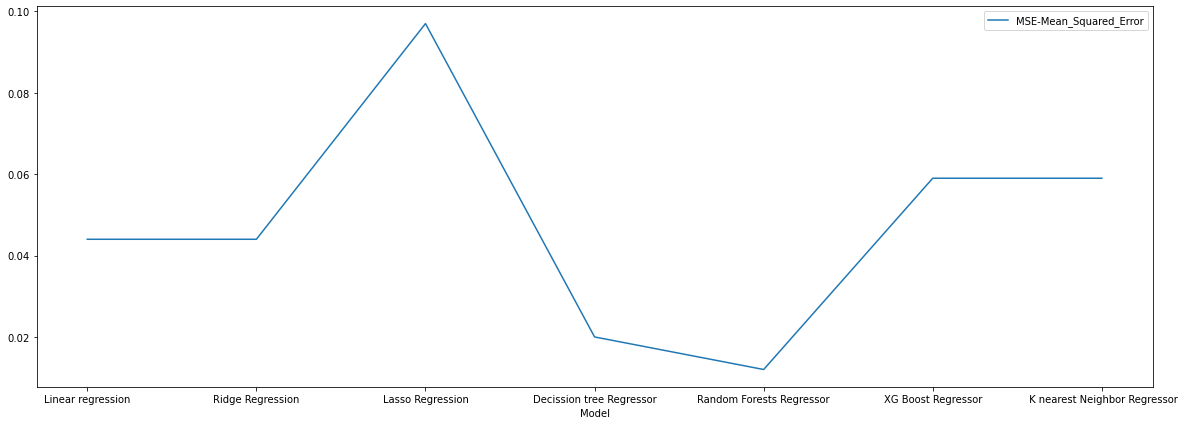

In [69]:
comparision.plot.line(x='Model', y= ['MSE-Mean_Squared_Error'], figsize=(20, 7) )

<AxesSubplot:xlabel='Model', ylabel='%'>

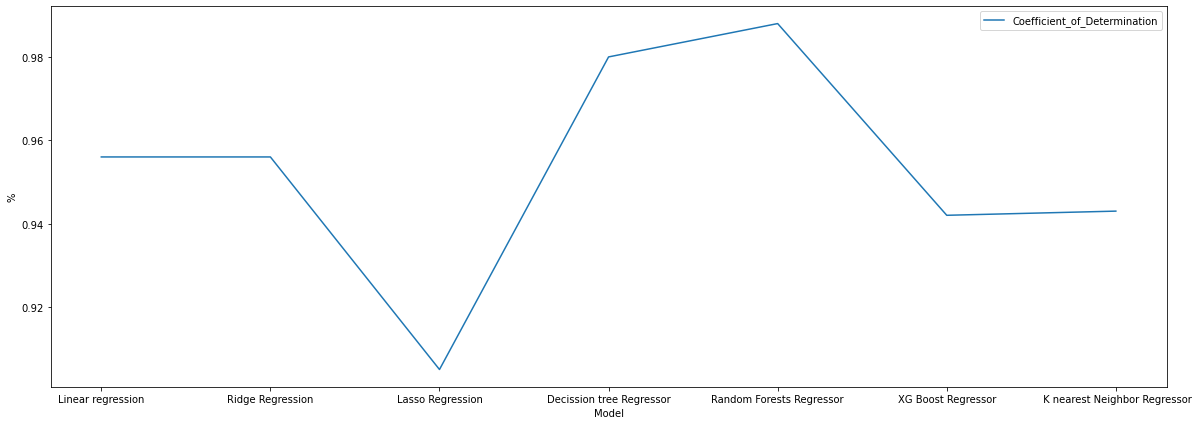

In [70]:
comparision.plot.line(x='Model', y= ['Coefficient_of_Determination'], figsize=(20, 7), ylabel = '%' )

<AxesSubplot:title={'center':' Model Performance Evaluation'}, xlabel='Model'>

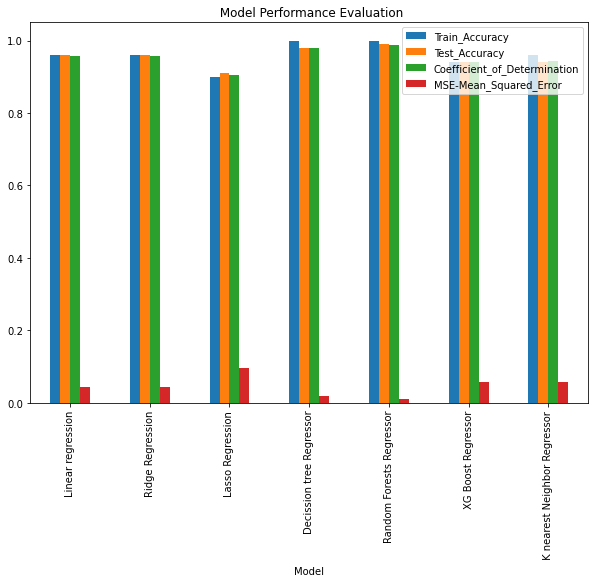

In [71]:
# Visualizing the performance of each model

comparision.plot.bar(x="Model", y=["Train_Accuracy", "Test_Accuracy", "Coefficient_of_Determination", "MSE-Mean_Squared_Error"], figsize=(10, 7), title = ' Model Performance Evaluation', legend = 'lower centre')


<AxesSubplot:title={'center':'Time Taken in Seconds'}, xlabel='Model'>

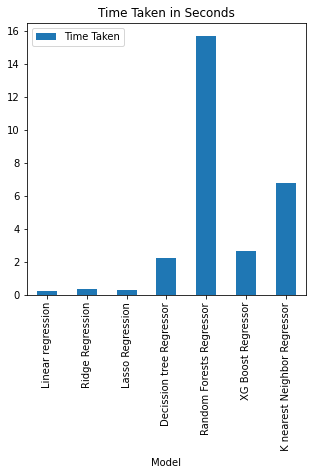

In [72]:
# Visualizing the Cost of computation for each model
comparision.plot.bar(x="Model", y=["Time Taken"], figsize=(5, 5), title='Time Taken in Seconds')